<a href="https://colab.research.google.com/github/laresamdeola/Computer-Vision/blob/main/Parkinson_Computer_Vision_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
!pip install --upgrade tensorflow keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
tf.__version__

'2.17.0'

In [ ]:
import os
import shutil

In [ ]:
os.getcwd()

'/content'

Folder Structure

In [ ]:
# --content
#   --Parkinson_Data
#     --test_data
#       --control
#       --pd
#     --train_data
#       --control
#       --pd
#     --validation_data
#       --control
#       --pd

In [ ]:
os.listdir('Parkinson_Data')

['test_data', 'train_data', 'validation_data']

In [ ]:
# import shutil

# def remove_checkpoints(directory='.'):
#     for root, dirs, files in os.walk(directory):
#         if '.ipynb_checkpoints' in dirs:
#             dir_path = os.path.join(root, '.ipynb_checkpoints')
#             shutil.rmtree(dir_path)
#             print(f"Removed {dir_path}")

# remove_checkpoints()

In [ ]:
# # Uncomment and Run this cell once

# shutil.rmtree('Parkinson_Data/.ipynb_checkpoints')
# shutil.rmtree('Parkinson_Data/train_data/.ipynb_checkpoints')
# shutil.rmtree('Parkinson_Data/test_data/.ipynb_checkpoints')
# shutil.rmtree('Parkinson_Data/validation_data/.ipynb_checkpoints')

In [ ]:
os.listdir('Parkinson_Data')

['test_data', 'train_data', 'validation_data']

In [ ]:
os.listdir('Parkinson_Data/train_data')

['control', 'pd']

In [ ]:
os.listdir('Parkinson_Data/test_data')

['control', 'pd']

In [ ]:
os.listdir('Parkinson_Data/validation_data')

['control', 'pd']

Image Augmentation - for preventing overfitting

In [ ]:
# Image size increased to 124x124 because of the InceptionV3 Model (min. image size - 75x75) and Xception (min. image size 71x71)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_set = train_datagen.flow_from_directory(
    'Parkinson_Data/train_data',
    target_size=(180,180),
    batch_size=2,
    class_mode='binary'
)

Found 573 images belonging to 2 classes.


In [ ]:
train_set.class_indices

{'control': 0, 'pd': 1}

In [ ]:
train_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Balance the Class using Class Weights

In [ ]:
from sklearn.utils import class_weight

y_train = train_set.classes

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(train_set.classes), y=train_set.classes)
class_weights_dict = dict(enumerate(class_weights))

In [ ]:
print(f'Computed clas weights: {class_weights_dict}')

Computed clas weights: {0: 1.5, 1: 0.75}


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

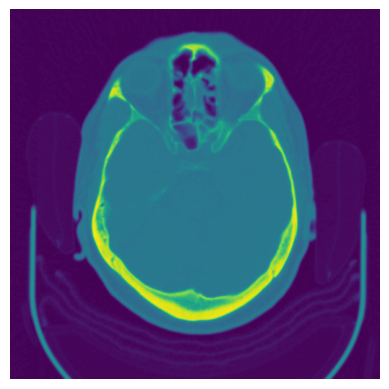

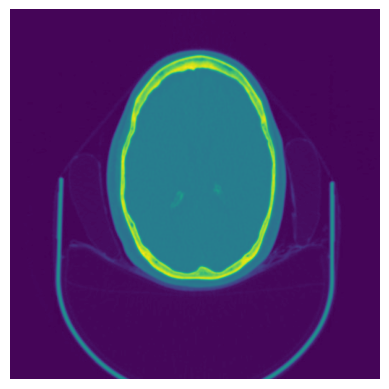

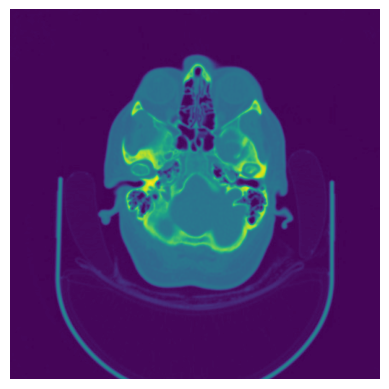

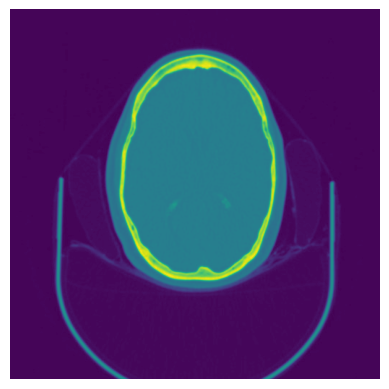

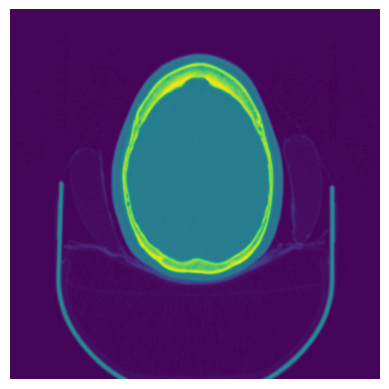

In [ ]:
for i in range(0, 5):
  image_path = train_set.filenames[i]
  image = mpimg.imread('/content/Parkinson_Data/train_data/' + image_path)
  plt.imshow(image)
  # plt.colorbar()
  plt.grid(False)
  plt.axis('off')
  plt.show()

In [ ]:
print(train_set.labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [ ]:
test_datagen = ImageDataGenerator(
    rescale=1./255
)

test_set = test_datagen.flow_from_directory(
    'Parkinson_Data/test_data',
    target_size=(180,180),
    batch_size=2,
    class_mode='binary'
)

Found 177 images belonging to 2 classes.


In [ ]:
test_set.filenames[0]

'control/PPMI_3186_CT_154-3186-1-01__br_raw_20200303154317392_46_S930991_I1299123 - Copy.JPG'

Validation Data

In [ ]:
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_set = validation_datagen.flow_from_directory(
    'Parkinson_Data/validation_data',
    target_size=(180,180),
    batch_size=2,
    class_mode='binary'
)

Found 130 images belonging to 2 classes.


In [ ]:
validation_set.class_indices

{'control': 0, 'pd': 1}

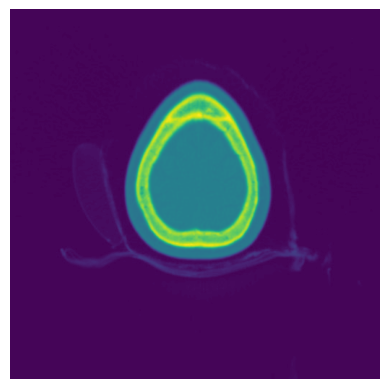

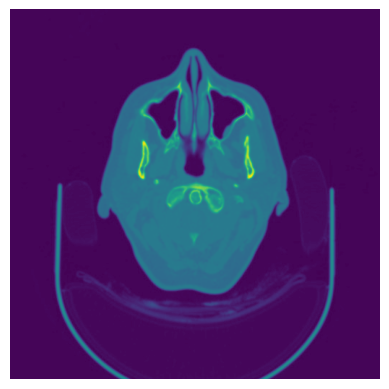

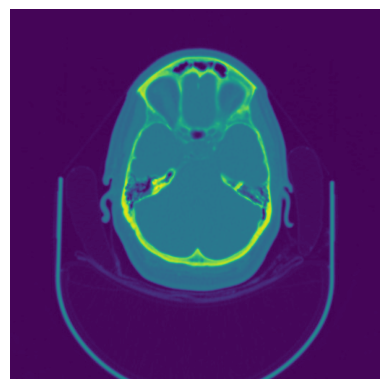

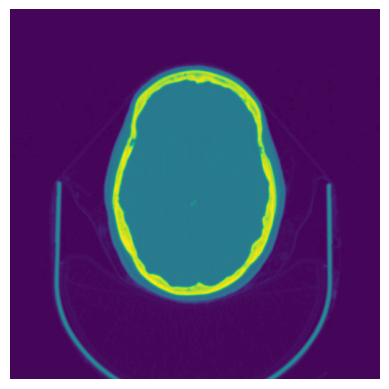

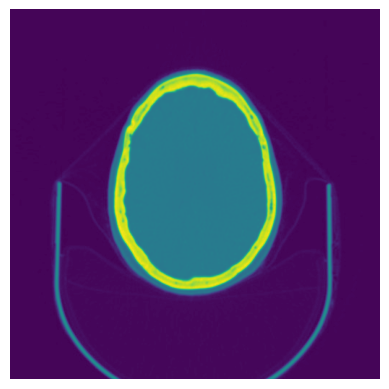

In [ ]:
for i in range(5, 10):
  image_path = validation_set.filenames[i]
  image = mpimg.imread('/content/Parkinson_Data/validation_data/' + image_path)
  plt.imshow(image)
  # plt.colorbar()
  plt.grid(False)
  plt.axis('off')
  plt.show()

CNN Model - using the Keras Sequential Class

In [ ]:
cnn = tf.keras.models.Sequential()























  Add the Convolutional Layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,
                               kernel_size=3,
                               activation='relu',
                               input_shape=[180,180,3]))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Add the Pooling Layer

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

Add Second Convolutional Layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,
                               kernel_size=3,
                               activation='relu',
                               input_shape=[180,180,3]))

Add Second Pooling Layer

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

Flatten the layer

In [ ]:
cnn.add(tf.keras.layers.Flatten())

Add Dropout Layer

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

Compile the Neural Network

In [ ]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'recall', 'precision'])

Train the Neural Network

In [ ]:
cnn.fit(x=train_set, validation_data=validation_set, epochs=32, class_weight=class_weights_dict)

Epoch 1/32


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


287/287 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.6843 - loss: 0.6955 - precision: 0.7639 - recall: 0.7922 - val_accuracy: 0.6615 - val_loss: 0.6635 - val_precision: 0.6792 - val_recall: 0.8780
Epoch 2/32
287/287 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.6225 - loss: 0.6846 - precision: 0.7273 - recall: 0.6430 - val_accuracy: 0.6231 - val_loss: 0.6416 - val_precision: 0.6667 - val_recall: 0.8049
Epoch 3/32
287/287 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.6845 - loss: 0.6031 - precision: 0.8027 - recall: 0.6970 - val_accuracy: 0.7077 - val_loss: 0.6074 - val_precision: 0.7340 - val_recall: 0.8415
Epoch 4/32
287/287 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.7184 - loss: 0.5683 - precision: 0.8003 - recall: 0.7794 - val_accuracy: 0.6769 - val_loss: 0.5808 - val_precision: 0.7174 - val_recall: 0.8049
Epoch 5/32
287/287 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.7217 - loss: 0.6074 - precision: 0.8345 - recall: 0.7200 - val_accuracy: 0.6538 - val_loss: 0.629

In [ ]:
print(cnn.input_shape)

(None, 180, 180, 3)


In [ ]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 118336)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 118336)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │         118,337 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 413,189 (1.58 MB)

 Trainable params: 137,729 (538.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 275,460 (1.05 MB)

In [ ]:
print(train_set.num_classes)

2


In [ ]:
print(test_set.classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
results = cnn.evaluate(test_set)

89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7751 - loss: 1.3137 - precision: 0.8699 - recall: 0.7663


In [ ]:
loss, accuracy, precision, recall = results

In [ ]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Accuracy: 0.8079096078872681
Precision: 0.805084764957428
Recall: 0.8962264060974121


In [ ]:
print(test_set.class_indices)

{'control': 0, 'pd': 1}


Precision, Recall, and f1

In [ ]:
import tensorflow

In [ ]:
from keras.applications import ResNet50, VGG16, InceptionV3, Xception
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.optimizers import Adam

ResNet50

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(180, 180, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)
resnet50_model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

resnet50_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', 'recall', 'precision'])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(resnet50_model.input)

<KerasTensor shape=(None, 180, 180, 3), dtype=float32, sparse=False, name=keras_tensor_29>


In [ ]:
steps_per_epoch = max(1, train_set.samples // train_set.batch_size)
validation_steps = max(1, test_set.samples // test_set.batch_size)

In [ ]:
history = resnet50_model.fit(
    train_set,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_set,
    validation_steps=validation_steps,
    epochs=10,
    class_weight=class_weights_dict
)

Epoch 1/10
284/286 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5191 - loss: 1.0667 - precision: 0.6751 - recall: 0.5221

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


286/286 ━━━━━━━━━━━━━━━━━━━━ 30s 61ms/step - accuracy: 0.5190 - loss: 1.0668 - precision: 0.6751 - recall: 0.5220 - val_accuracy: 0.6308 - val_loss: 0.6595 - val_precision: 0.6308 - val_recall: 1.0000
Epoch 2/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0000e+00 - loss: 1.5290 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.6308 - val_loss: 0.6578 - val_precision: 0.6308 - val_recall: 1.0000
Epoch 3/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.4755 - loss: 0.8500 - precision: 0.6173 - recall: 0.4446 - val_accuracy: 0.6308 - val_loss: 0.6606 - val_precision: 0.6308 - val_recall: 1.0000
Epoch 4/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 0.1666 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.6308 - val_loss: 0.6604 - val_precision: 0.6308 - val_recall: 1.0000
Epoch 5/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - accuracy: 0.5717 - loss: 0.6926 - precision: 0.6958 - recall: 0.6603 - val_accuracy: 0.3692 - val_lo

In [ ]:
results_resnet = resnet50_model.evaluate(test_set)

89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.3574 - loss: 0.6956 - precision: 0.2407 - recall: 0.0061


In [ ]:
loss_resnet, accuracy_resnet, precision_resnet, recall_resnet = results_resnet

In [ ]:
print(f'Accuracy: {accuracy_resnet}')
print(f'Precision: {precision_resnet}')
print(f'Recall: {recall_resnet}')

Accuracy: 0.32768362760543823
Precision: 0.008474576286971569
Recall: 0.3333333432674408


VGG16

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(180, 180, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)  # Changed to 1 unit with sigmoid activation
vgg16_model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

vgg16_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', 'recall', 'precision'])  # Changed to 'binary_crossentropy'


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
history = vgg16_model.fit(
    train_set,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_set,
    validation_steps=validation_steps,
    epochs=10,
    class_weight=class_weights_dict
)

Epoch 1/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.5349 - loss: 0.7528 - precision: 0.7016 - recall: 0.5732 - val_accuracy: 0.6615 - val_loss: 0.6564 - val_precision: 0.7209 - val_recall: 0.7561
Epoch 2/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0000e+00 - loss: 1.1180 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.6385 - val_loss: 0.6673 - val_precision: 0.7273 - val_recall: 0.6829
Epoch 3/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.5480 - loss: 0.7345 - precision: 0.6923 - recall: 0.5482 - val_accuracy: 0.5077 - val_loss: 0.7155 - val_precision: 0.7045 - val_recall: 0.3780
Epoch 4/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 0.3806 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.4923 - val_loss: 0.7170 - val_precision: 0.7000 - val_recall: 0.3415
Epoch 5/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.5736 - loss: 0.6897 - precision: 0.7250 - recall: 0.5671 - val_accuracy: 0.53

In [ ]:
results_vgg16 = vgg16_model.evaluate(test_set)

89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6852 - loss: 0.6508 - precision: 0.7229 - recall: 0.7776


In [ ]:
loss_vgg16, accuracy_vgg16, precision_vgg16, recall_vgg16 = results_vgg16

In [ ]:
print(f'Accuracy: {accuracy_vgg16}')
print(f'Precision: {precision_vgg16}')
print(f'Recall: {recall_vgg16}')

Accuracy: 0.6836158037185669
Precision: 0.7796609997749329
Recall: 0.7540983557701111


InceptionV3

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(180, 180, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)  # Changed to 1 unit with sigmoid activation
inceptionv3_model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

inceptionv3_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', 'recall', 'precision'])  # Changed to 'binary_crossentropy'

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
history = inceptionv3_model.fit(
    train_set,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_set,
    validation_steps=validation_steps,
    epochs=10,
    class_weight=class_weights_dict
)

Epoch 1/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 39s 78ms/step - accuracy: 0.5956 - loss: 2.5648 - precision: 0.7353 - recall: 0.6213 - val_accuracy: 0.5077 - val_loss: 1.5634 - val_precision: 0.8462 - val_recall: 0.2683
Epoch 2/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5000 - loss: 0.7032 - precision: 1.0000 - recall: 0.5000 - val_accuracy: 0.4615 - val_loss: 1.9947 - val_precision: 1.0000 - val_recall: 0.1463
Epoch 3/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.6178 - loss: 1.3544 - precision: 0.7826 - recall: 0.6066 - val_accuracy: 0.6769 - val_loss: 0.6410 - val_precision: 0.7564 - val_recall: 0.7195
Epoch 4/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 1.0000 - loss: 0.0327 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.6385 - val_loss: 0.7312 - val_precision: 0.7966 - val_recall: 0.5732
Epoch 5/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6603 - loss: 0.8340 - precision: 0.8139 - recall: 0.6454 - val_accuracy: 0.7308 - val_lo

In [ ]:
results_inceptionv3 = inceptionv3_model.evaluate(test_set)

89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.7993 - loss: 0.5028 - precision: 0.8461 - recall: 0.8309


In [ ]:
loss_inceptionv3, accuracy_inceptionv3, precision_inceptionv3, recall_inceptionv3 = results_inceptionv3

In [ ]:
print(f'Accuracy: {accuracy_inceptionv3}')
print(f'Precision: {precision_inceptionv3}')
print(f'Recall: {recall_inceptionv3}')

Accuracy: 0.7344632744789124
Precision: 0.8135592937469482
Recall: 0.7933884263038635


Xception

In [ ]:
base_model = Xception(weights='imagenet', include_top=False, input_shape=(180, 180, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)  # Changed to 1 unit with sigmoid activation
xception_model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

xception_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', 'recall', 'precision'])  # Changed to 'binary_crossentropy'


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
history = xception_model.fit(
    train_set,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_set,
    validation_steps=validation_steps,
    epochs=10,
    class_weight=class_weights_dict
)

Epoch 1/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 27s 60ms/step - accuracy: 0.5629 - loss: 1.2588 - precision: 0.7044 - recall: 0.6114 - val_accuracy: 0.6923 - val_loss: 0.6135 - val_precision: 0.7059 - val_recall: 0.8780
Epoch 2/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5000 - loss: 1.1351 - precision: 0.5000 - recall: 1.0000 - val_accuracy: 0.6923 - val_loss: 0.6212 - val_precision: 0.7283 - val_recall: 0.8171
Epoch 3/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.6967 - loss: 0.6557 - precision: 0.8219 - recall: 0.6956 - val_accuracy: 0.7000 - val_loss: 0.6124 - val_precision: 0.6838 - val_recall: 0.9756
Epoch 4/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5000 - loss: 0.7027 - precision: 0.5000 - recall: 1.0000 - val_accuracy: 0.7308 - val_loss: 0.6293 - val_precision: 0.7043 - val_recall: 0.9878
Epoch 5/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.7020 - loss: 0.6376 - precision: 0.7983 - recall: 0.7232 - val_accuracy: 0.8077 - val_los

In [ ]:
results_xception = xception_model.evaluate(test_set)

89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7560 - loss: 0.7930 - precision: 0.8208 - recall: 0.8170


In [ ]:
loss_xception, accuracy_xception, precision_xception, recall_xception = results_xception

In [ ]:
print(f'Accuracy: {accuracy_xception}')
print(f'Precision: {precision_xception}')
print(f'Recall: {recall_xception}')

Accuracy: 0.7457627058029175
Precision: 0.805084764957428
Recall: 0.811965823173523


Credits

In [ ]:
# @misc{https://doi.org/10.5281/zenodo.13120260,
#     doi = {10.5281/ZENODO.13120260},
#     url = {https://zenodo.org/doi/10.5281/zenodo.13120260},
#     author = {Adeola, Lare}, {Ikechukwu, Nneoma Joyce}
#     keywords = {Computer Vision, Applied Machine Learning, Deep Learning, Parkinson's Disease, neurodegenerative disease},
#     title = {Using Computer Vision to detect Parkinson's Disease},
#     publisher = {Zenodo},
#     year = {2024},
#     copyright = {Creative Commons Attribution 4.0 International}
# }

In [ ]:
import pandas as pd

data_frame = pd.DataFrame({
    'models': ['CNN', 'VGG16'],
    'precision': [0.8, 0.77],
    'accuracy': [0.65, 0.8],
    'recall': [0.8, 0.88]
})

In [ ]:
print(data_frame)

  models  precision  accuracy  recall
0    CNN       0.80      0.65    0.80
1  VGG16       0.77      0.80    0.88
